# Guide to pyphenomd.py

In [2]:
import os
os.chdir('/Users/michaelkatz/Documents/Research/PythonCodes/BOWIE_analysis/snr_calculator_folder/')
from snr_calculator.pyphenomd import PhenomDWaveforms, SNRCalculation, snr
from pyphenomd.read_noise_curves import read_noise_curve
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy import interpolate
%matplotlib inline

This guide shows the usage of the two classes within pyphenomd, PhenomDWaveforms and SNRCalculation, as well as the function *snr* that combines these two classes into an efficient interface. These are both used in generate_contour_data.py. The final portion of this notebook will detail the use of the snr functino also included in pyphenomd. This is not used in generate_contour_data.py, but it does provide a handy way to calculate the signal-to-noise ratio (SNR) of a binary (or many binaries) by inputing binary parameters. For specific inputs and outputs of these classes and functions, use the python function help(). 

For usage of these codes, please cite the paper for BOWIE, (arXiv:1807.02511). This code is shared under the GNU Public License. 

If you use PhenomDWaveforms or snr function, please cite Husa et al 2016 (arXiv:1508.07250), Khan et al 2016 (arXiv:1508.07253).

## PhenomDWaveforms

PhenomDWaveforms takes binary parameter inputs of either scalar value or 1D arrays. It outputs frequency domain waveforms produced by phenomD (See Husa et al 2016 (arXiv:1508.07250) and Khan et al 2016 (arXiv:1508.07253)). In its current state, it returns the amplitude and not the phase. Its returns are frequencies and charactersitic strain amplitudes, as well as the merger frequency and peak frequency. The merger frequency separates the inspiral phase from teh merger phase, and the peak frequency separates merger from ringdown (see paper describing BOWIE for details, arXiv: *********).

What follows is a few examples using this class.

### Array Input on all Parameters

Frequencies -> [[1.24929558e-02 1.24933526e-02 1.24937493e-02 ... 1.62033821e-02
  1.62038966e-02 1.62044112e-02]
 [3.28623112e-04 3.28888755e-04 3.29154614e-04 ... 2.45694071e-01
  2.45892679e-01 2.46091447e-01]
 [6.74192289e-07 6.74414715e-07 6.74637214e-07 ... 1.00441360e-05
  1.00474497e-05 1.00507645e-05]] 

Characteristic Strain Amplitude -> [[5.32736274e-21 5.32733444e-21 5.32730613e-21 ... 5.10044737e-21
  5.10042025e-21 5.10039313e-21]
 [6.45853116e-19 6.45762864e-19 6.45672622e-19 ... 5.66131204e-24
  5.59767411e-24 5.53472122e-24]
 [1.06376528e-16 1.06291469e-16 1.06206443e-16 ... 2.05295966e-21
  2.04621827e-21 2.03949758e-21]] 

Merger Frequencies -> [3.63402867e+01 2.66495436e-02 1.08840958e-06] 

Peak Frequencies -> [1.02612958e+02 8.69314997e-02 2.10876065e-06] 



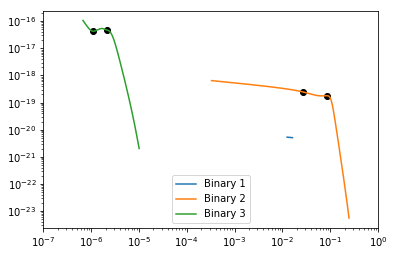

In [2]:
#masses
m1 =np.array([1e1, 1e5, 1e9])
m2 = np.array([1e2, 1e4, 1e7])

#spins
chi1 = np.array([0.3, 0.5, -0.8])
chi2 = np.array([0.2, 0.99, -0.9])

#redshift
z = np.array([0.1, 0.5, 3.0])

#start times
st = np.array([10.0, 1.0, 8.0])

#end times
et = np.array([5.0, 0.0, 0.0])

wave = PhenomDWaveforms(m1, m2, chi1, chi2, z, st, et)

## Produce Waveforms ##
wave.create_waveforms()

## Print Waveforms ##
print('Frequencies ->', wave.freqs, '\n')
print('Characteristic Strain Amplitude ->', wave.amplitude, '\n')
print('Merger Frequencies ->', wave.fmrg, '\n')
print('Peak Frequencies ->', wave.fpeak, '\n')

for i in range(len(wave.freqs)):
    plt.loglog(wave.freqs[i], wave.amplitude[i], label=r'Binary %i'%(i+1))
    for f in [wave.fmrg[i], wave.fpeak[i]]:
        if np.searchsorted(wave.freqs[i], f) < len(wave.freqs[i]):
            plt.scatter(f, wave.amplitude[i][np.searchsorted(wave.freqs[i], f)], color='k')
plt.xlim(1e-7, 1e0)
plt.legend(loc = 'lower center')

### Scalar input for start and end Times, as well as luminosity distance as input rather than redshift. 

Frequencies -> [[1.32407967e-02 1.32573493e-02 1.32739226e-02 ... 3.67387264e+02
  3.67846543e+02 3.68306397e+02]
 [1.58691171e-04 1.58837925e-04 1.58984814e-04 ... 3.07565497e-01
  3.07849926e-01 3.08134618e-01]
 [3.47136584e-07 3.47238382e-07 3.47340209e-07 ... 3.83063344e-06
  3.83175677e-06 3.83288043e-06]] 

Characteristic Strain Amplitude -> [[2.32079623e-19 2.32031118e-19 2.31982623e-19 ... 1.26419911e-24
  1.24493701e-24 1.22595389e-24]
 [1.77230206e-18 1.77202345e-18 1.77174488e-18 ... 1.32379996e-23
  1.30679275e-23 1.28999479e-23]
 [3.53864001e-17 3.53668679e-17 3.53473683e-17 ... 1.40076141e-21
  1.39667191e-21 1.39259357e-21]] 

Merger Frequencies -> [3.98843499e+01 3.33682744e-02 4.15067307e-07] 

Peak Frequencies -> [1.12620221e+02 1.08848173e-01 8.04180359e-07] 



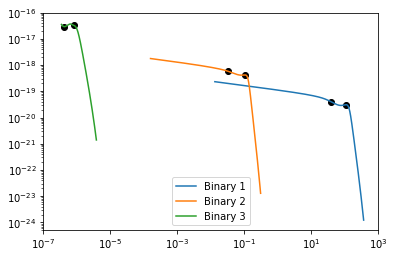

In [3]:
#start times
st = 10.0

#end times
et = 0.0

#luminosity distance (Mpc)
lum_dis = np.array([1e1, 1e3, 1e5])

wave = PhenomDWaveforms(m1, m2, chi1, chi2, lum_dis, st, et, dist_type='luminosity_distance')

## Produce Waveforms ##
wave.create_waveforms()

## Print Waveforms ##
print('Frequencies ->', wave.freqs, '\n')
print('Characteristic Strain Amplitude ->', wave.amplitude, '\n')
print('Merger Frequencies ->', wave.fmrg, '\n')
print('Peak Frequencies ->', wave.fpeak, '\n')
for i in range(len(wave.freqs)):
    plt.loglog(wave.freqs[i], wave.amplitude[i], label=r'Binary %i'%(i+1))
    for f in [wave.fmrg[i], wave.fpeak[i]]:
        if np.searchsorted(wave.freqs[i], f) < len(wave.freqs[i]):
            plt.scatter(f, wave.amplitude[i][np.searchsorted(wave.freqs[i], f)], color='k')
plt.xlim(1e-7, 1e3)
plt.legend(loc = 'lower center')

### All scalar inputs and comoving distance as distance measure. Also, change number of frequency points.  

Frequencies -> [3.10285378e-03 3.10462732e-03 3.10640187e-03 ... 3.60525927e+01
 3.60731997e+01 3.60938185e+01] 

Characteristic Strain Amplitude -> [2.00114629e-19 2.00095455e-19 2.00076283e-19 ... 9.83896063e-25
 9.72772630e-25 9.61771894e-25] 

Merger Frequencies -> 3.9086437296484253 

Peak Frequencies -> 18.232489121529646 



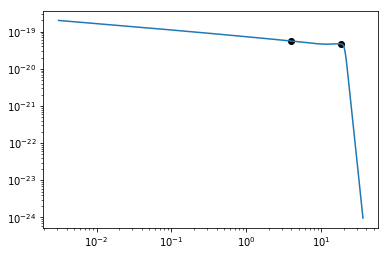

In [4]:
m1, m2, chi1, chi2, com_dist, st, et = 1e2,1e3,0.99,0.9, 1e2, 10.0, 0.0

wave = PhenomDWaveforms(m1, m2, chi1, chi2, com_dist, st, et, dist_type='comoving_distance', num_points=int(2**14))

## Produce Waveforms ##
wave.create_waveforms()

## Print Waveforms ##
print('Frequencies ->', wave.freqs, '\n')
print('Characteristic Strain Amplitude ->', wave.amplitude, '\n')
print('Merger Frequencies ->', wave.fmrg, '\n')
print('Peak Frequencies ->', wave.fpeak, '\n')

plt.loglog(wave.freqs, wave.amplitude)
for f in [wave.fmrg, wave.fpeak]:
    if np.searchsorted(wave.freqs, f) < len(wave.freqs):
        plt.scatter(f, wave.amplitude[np.searchsorted(wave.freqs, f)], color='k')


## SNRCalculation

SNRCalculation takes waveform frequencies and amplitudes, merger frequencies, peak frequencies, and noise curve values at the waveform frequencies. It returns SNR values for each phase of coalescence as a attribute of type dict.  

In [5]:
## Create Waveforms First ##

#masses
m1 =np.array([1e1, 1e5, 1e9])
m2 = np.array([1e2, 1e4, 1e7])

#spins
chi1 = np.array([0.3, 0.5, -0.8])
chi2 = np.array([0.2, 0.99, -0.9])

#redshift
z = np.array([0.1, 0.5, 3.0])

#start times
st = np.array([10.0, 1.0, 8.0])

#end times
et = np.array([5.0, 0.0, 0.0])

wave = PhenomDWaveforms(m1, m2, chi1, chi2, z, st, et)
wave = PhenomDWaveforms(m1, m2, chi1, chi2, z, st, et)
wave.create_waveforms()

#use proposed LISA
ASD_data = ascii.read('../noise_curves/' + 'PL' + '.txt')

f_n = ASD_data['f']
ASD = ASD_data['ASD']

#convert noise curve to characteristic strain
hn = ASD*np.sqrt(f_n)

#interpolate noise curve
noise_interp = interpolate.interp1d(f_n, hn, bounds_error=False, fill_value=1e30)

hn_vals = noise_interp(wave.freqs)

snr_out = SNRCalculation(wave.freqs, wave.amplitude, hn_vals, wave.fmrg, wave.fpeak, prefactor=1)

for key in ['all', 'ins', 'mrg', 'rd']:
    print(key, snr_out.snr_out_dict[key], '\n')

all [1.92715867e+00 5.46387909e+02 5.73440491e-06] 

ins [1.92715867e+00 5.43985213e+02 4.62706210e-47] 

mrg [0.00000000e+00 5.07264110e+01 3.99152943e-47] 

rd [0.00000000e+00 6.83126134e+00 5.73440491e-06] 



# snr function

The snr function is provided as a handy way to combine PhenomDWaveforms and SNRCalculation classes. The input is binary parameters and a sensitivity curve (a default is set to Proposed LISA). If wd_noise is True, the Hils-Bender approximation is used. It outputs the snr for a certain phase or all phases.

In [6]:
#masses
m1 =np.array([1e1, 1e5, 1e9])
m2 = np.array([1e2, 1e4, 1e7])

#spins
chi1 = np.array([0.3, 0.5, -0.8])
chi2 = np.array([0.2, 0.99, -0.9])

#redshift
z = np.array([0.1, 0.5, 3.0])

#start times
st = np.array([10.0, 1.0, 8.0])

#end times
et = np.array([5.0, 0.0, 0.0])

out = snr(m1, m2, chi1, chi2, z, 
    st, et, sensitivity_curve='PL', 
    wd_noise=False, phase='all', prefactor=1.0, 
    dist_type='redshift', num_points=8192)

print(out)

[1.92715867e+00 5.46387909e+02 5.73440491e-06]


# Read noise curves

read_noise_curves.py provides an easy way to interface with the noise curves provided with the package. They are detailed in our paper mentioned above. You can choose the output type of the curve and if you want to add Hils-Bender White Dwarf background noise. 

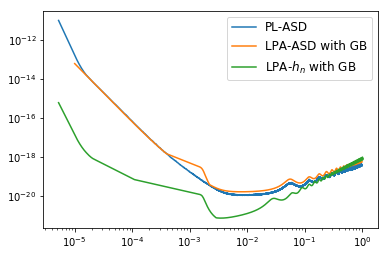

In [10]:
fn, amp = read_noise_curve('PL', wd_noise=False, noise_type='ASD')
plt.loglog(fn, amp, label='PL-ASD')

fn, amp = read_noise_curve('LPA', wd_noise=True, noise_type='ASD')
plt.loglog(fn, amp, label='LPA-ASD with GB')

fn, amp = read_noise_curve('CLLF', wd_noise=True, noise_type='characteristic_strain')
plt.loglog(fn, amp, label=r'LPA-$h_n$ with GB')

plt.legend(prop={'size':12})